In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np

In [4]:
from keras.applications import vgg16
from keras.applications import inception_v3, resnet50

In [6]:
#from keras.applications import mobilenet

In [7]:
vgg_model = vgg16.VGG16(weights='imagenet')

In [20]:
vgg_model.save('vgg16_imagenet.h5')

In [8]:
inception_model = inception_v3.InceptionV3(weights='imagenet')

In [21]:
inception_model.save('inception_v3_imagenet.h5')

In [9]:
resnet_model = resnet50.ResNet50(weights='imagenet')

In [22]:
resnet_model.save('resnet_imagenet.h5')

In [11]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [12]:
keras.__version__

'2.0.2'

In [15]:
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
!ls -la

total 1470360
drwxr-xr-x  8 jc  staff        272 Jul 23 16:45 .
drwxr-xr-x  7 jc  staff        238 Jul 23 16:41 ..
drwxr-xr-x  3 jc  staff        102 Jul 23 16:27 .ipynb_checkpoints
-rw-r--r--  1 jc  staff       7445 Jul 23 16:45 Untitled.ipynb
drwxr-xr-x  2 jc  staff         68 Jul 23 16:41 images
-rw-r--r--  1 jc  staff   96260024 Jul 23 16:44 inception_v3_imagenet.h5
-rw-r--r--  1 jc  staff  103045408 Jul 23 16:45 resnet_imagenet.h5
-rw-r--r--  1 jc  staff  553505192 Jul 23 16:44 vgg16_imagenet.h5


In [27]:
filename = './images/cat.jpg'

In [28]:
original = load_img(filename, target_size=(224, 224))

In [29]:
original.size

(224, 224)

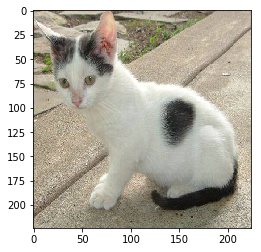

In [30]:
plt.imshow(original)

In [31]:
numpy_image = img_to_array(original)

In [46]:
numpy_image.shape

(224, 224, 3)

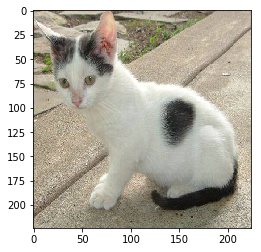

In [34]:
plt.imshow(np.uint8(numpy_image))

In [35]:
image_batch = np.expand_dims(numpy_image, axis=0)

In [36]:
image_batch.shape

(1, 224, 224, 3)

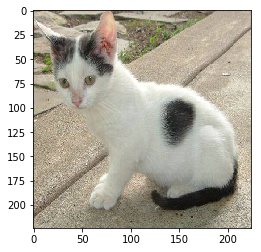

In [37]:
plt.imshow(np.uint8(image_batch[0]))

In [38]:
processed_image = vgg16.preprocess_input(image_batch.copy())

In [39]:
predictions = vgg_model.predict(processed_image)

In [40]:
label = decode_predictions(predictions)
label

[[(u'n02123597', u'Siamese_cat', 0.30934173),
  (u'n01877812', u'wallaby', 0.080341272),
  (u'n02326432', u'hare', 0.075098492),
  (u'n02325366', u'wood_rabbit', 0.050530687),
  (u'n03223299', u'doormat', 0.048173629)]]

In [47]:
original2 = load_img(filename, target_size=(299, 299))
original2.size

(299, 299)

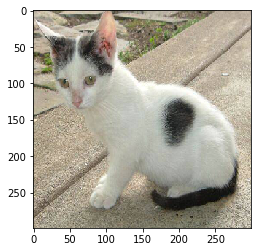

In [50]:
plt.imshow(original2)

In [52]:
numpy_image2 = img_to_array(original2)
numpy_image2.shape

(299, 299, 3)

In [54]:
image_batch2 = np.expand_dims(numpy_image2, axis=0)

In [55]:
inception_pimg = inception_v3.preprocess_input(image_batch2.copy())

In [58]:
inception_pimg.shape

(1, 299, 299, 3)

In [59]:
inception_pred = inception_model.predict(inception_pimg)

In [60]:
label2 = decode_predictions(inception_pred)

In [61]:
label2

[[(u'n02124075', u'Egyptian_cat', 0.66225916),
  (u'n02123045', u'tabby', 0.050285082),
  (u'n02123597', u'Siamese_cat', 0.036381535),
  (u'n02123159', u'tiger_cat', 0.02352237),
  (u'n03223299', u'doormat', 0.015205652)]]

In [62]:
processed_image3 = resnet50.preprocess_input(image_batch.copy())

In [63]:
resnet_pred = resnet_model.predict(processed_image3)

In [64]:
label3 = decode_predictions(resnet_pred)
label3

[[(u'n02123597', u'Siamese_cat', 0.15669844),
  (u'n03223299', u'doormat', 0.15410465),
  (u'n02124075', u'Egyptian_cat', 0.12690806),
  (u'n03958227', u'plastic_bag', 0.060018141),
  (u'n02123045', u'tabby', 0.046417166)]]